In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Bengaluru_House_Data.csv")

In [3]:
# Task 1 — Load & Inspect the Dataset
# 1.	Load the dataset  into your notebook.
# 2.	Display the first 5 and last 5 rows of the dataset.
# 3.	Print dataset shape (rows, columns).
# 4.	Print dataset information using .info().
# 5.	Identify basic data types of all columns.

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [7]:
df.shape

(13320, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [11]:
# Task 2 — Clean the Dataset
# Identify and count missing values in each column.
# Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).
# Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
# Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
# Remove duplicate rows.
# 6. Reset the DataFrame index after cleaning


In [12]:
df.isnull().count()

,0
area_type,13320
availability,13320
location,13320
size,13320
society,13320
total_sqft,13320
bath,13320
balcony,13320
price,13320


In [15]:
df.isnull().sum()
df.drop(['society'],axis=1,inplace=True,errors='ignore')
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)
# total_sqft cleanup
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

/tmp/ipython-input-1316931121.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)
/tmp/ipython-input-1316931121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [18]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [20]:
avg_price_per_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
display(avg_price_per_location)

,price
location,
Cubbon Road,1900.000000
Ashok Nagar,1486.000000
Defence Colony,1167.714286
Yemlur,1093.388889
Church Street,1068.000000
...,...
Celebrity Paradise Layout,19.245000
BAGUR,17.000000
Makali,16.000000


In [26]:
highest_price_per_location = df.groupby('location')['price'].max().sort_values(ascending=False)
highest_price_per_location

,price
location,
Defence Colony,3600.0
Ashok Nagar,2912.0
Sadashiva Nagar,2736.0
Shanthala Nagar,2700.0
Dollars Colony,2600.0
...,...
Shauhardha Layout,20.0
Pillanna Gardens,20.0
Makali,18.0


In [29]:
df[['total_sqft', 'bath', 'price']].corr()

,total_sqft,bath,price
total_sqft,1.000000,0.385367,0.573858
bath,0.385367,1.000000,0.450564
price,0.573858,0.450564,1.000000


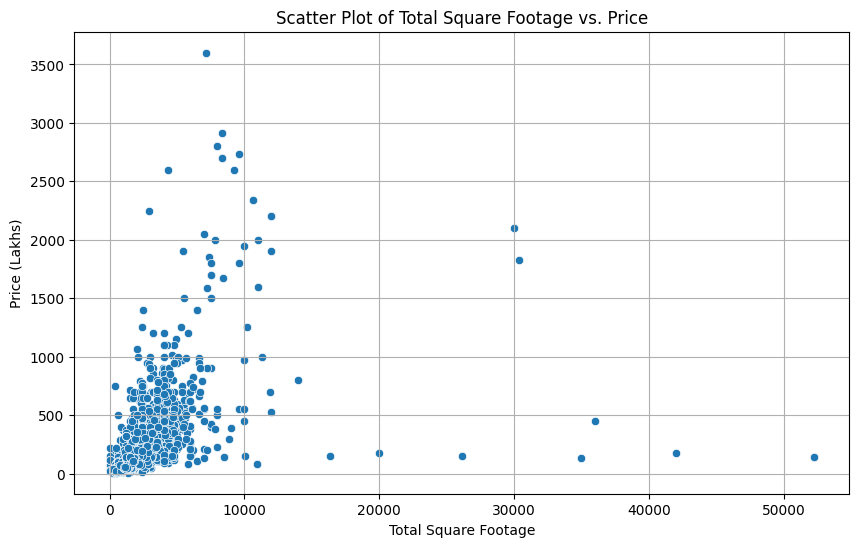

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot of Total Square Footage vs. Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Price (Lakhs)')
plt.grid(True)
plt.show()

In [32]:
# Task 4 — Data Visualization
# Use the specific visualization types mentioned for each question.
# Price Distribution:
# Plot the distribution of the price column using a Histogram + KDE curve.
# Relationship Between Area and Price:
# Visualize the relationship between total_sqft and price using a Scatter Plot.
# Effect of Bathrooms on Price:
# Show how bath count affects house prices using a Box Plot.
# Top 10 Most Expensive Locations:
# Plot the Top 10 locations with highest average price using a Bar Chart.
# Correlation Between Numeric Columns:
# Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).


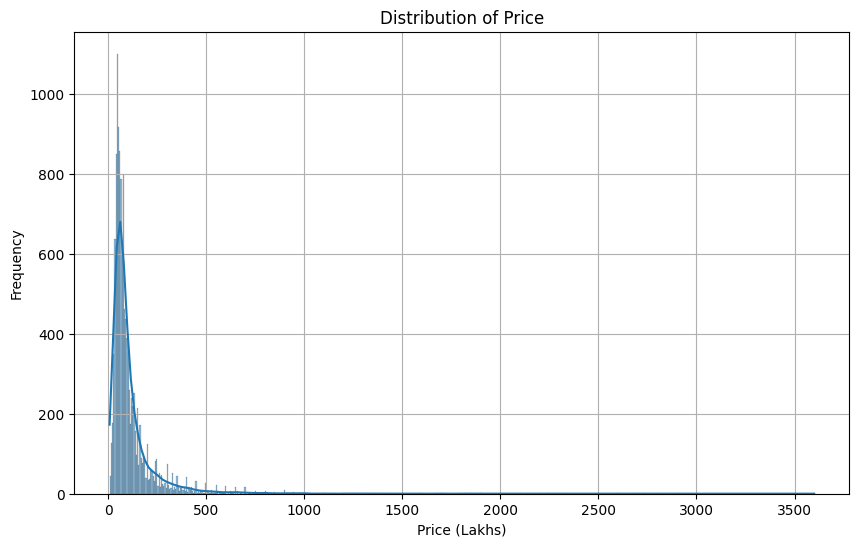

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

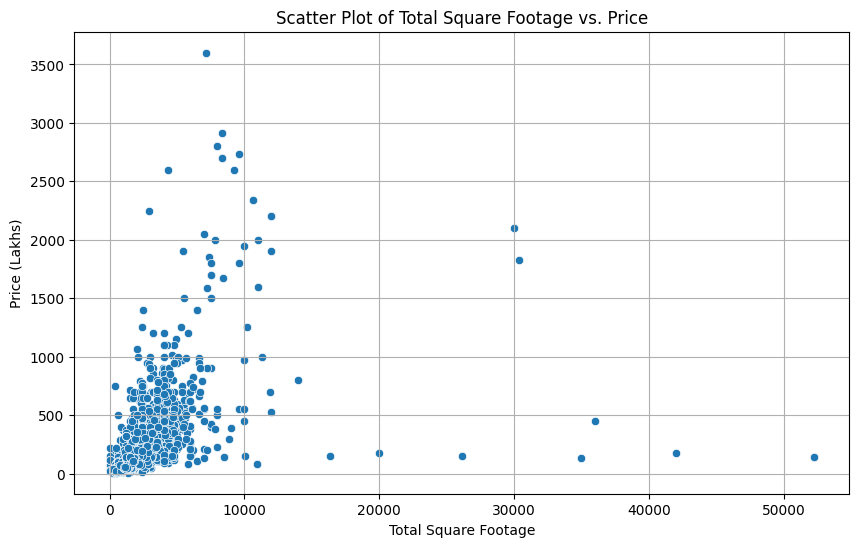

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft',y='price',data=df)
plt.title('Scatter Plot of Total Square Footage vs. Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Price (Lakhs)')
plt.grid(True)
plt.show()

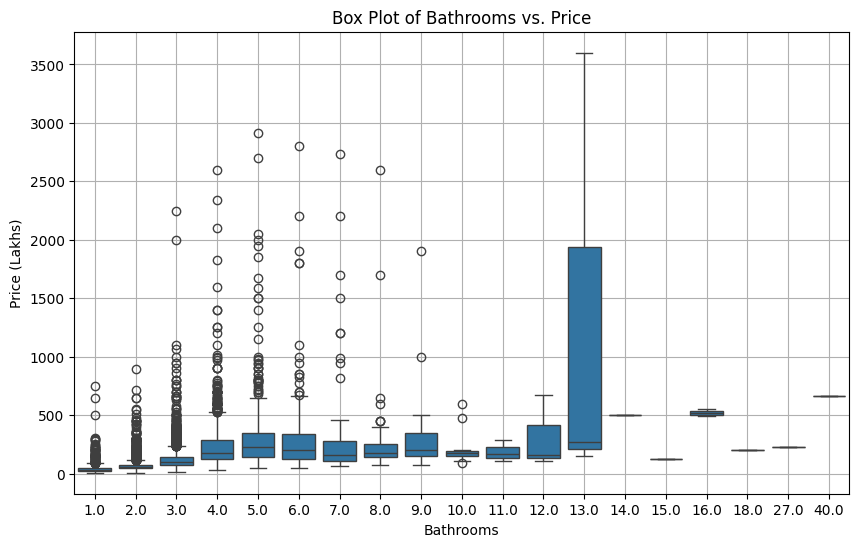

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bath',y='price',data=df)
plt.title('Box Plot of Bathrooms vs. Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price (Lakhs)')
plt.grid(True)
plt.show()

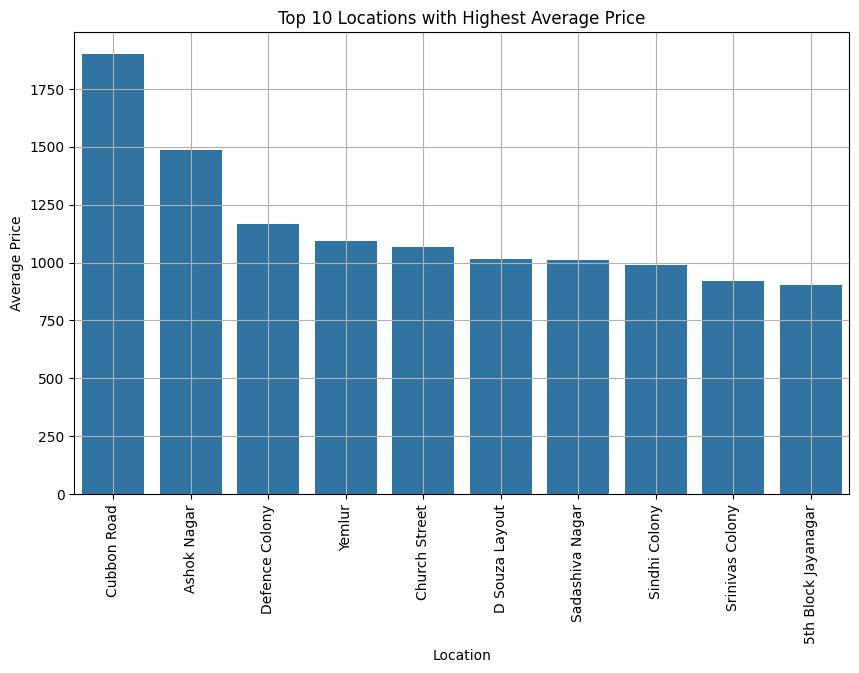

In [43]:
plt.figure(figsize=(10, 6))
top_10_avg_prices = avg_price_per_location.head(10)
sns.barplot(x=top_10_avg_prices.index, y=top_10_avg_prices.values)
plt.title('Top 10 Locations with Highest Average Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

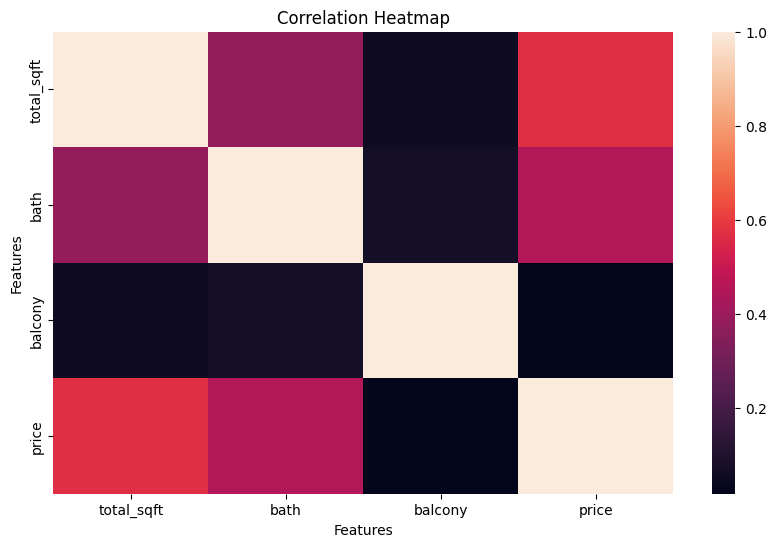

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['total_sqft', 'bath', 'balcony', 'price']].corr())
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [48]:
beng=df.to_csv("/content/drive/MyDrive/bengaluru.csv", index=False)

In [49]:
df1=pd.read_csv("/content/drive/MyDrive/bengaluru.csv")
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
